# Project #1 Fourier Transform on Images

Sarisha Das | 190003054 | AA 202N

### AIM

- Understand how to use Fourier Transform on Images
- Understand how can Fourier Transform be applied in various places including Image Filtering, Image Pre-processing for ML applications etc.
- Apply Fourier Transform for edge detection on images from galaxy zoo dataset to estimate eccentricity of the galaxy.

<br>
We have learnt how to apply Fourier Transforms to one dimensional waves, namely sound waves.

But we can apply them to 2D spaces also. We will first see the Fourier transforms of different images and then use them to apply filters. We can also observe how pre-processing them will fare better results for ML Algorithms. First we will import dependencies.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image #So that we can convert image to numpy array
%matplotlib inline

## 2D Fourier Transform
The formula for Fourier Transform is:

### $ X (n \omega_0 ) \equiv T X (k) = \int_T x (t) e^{-in \omega_0 t} dt $

Discretizing, we get:

### $  X (k) = \sum_{t=1}^{N} x (t) e^{-i2\pi k t/N} $

And For inverse Fourier: $  x (t) = \sum_{k=1}^{N} x (k) e^{i2\pi k t/N} $

Extending to 2 dimensions we can get:

### $ X(s,t) = \sum_{n} \sum_{m} x(n,m) e^{-i2\pi k m/M} e^{-i2\pi k n/N}$

Inverse:

### $ x(n,m) = \sum_{n} \sum_{m} X(s,t) e^{i2\pi k m/M} e^{i2\pi k n/N}$

We can start by plotting some simple Fourier transforms. We will use np.fft.fft2 for 2D fourier transforms.

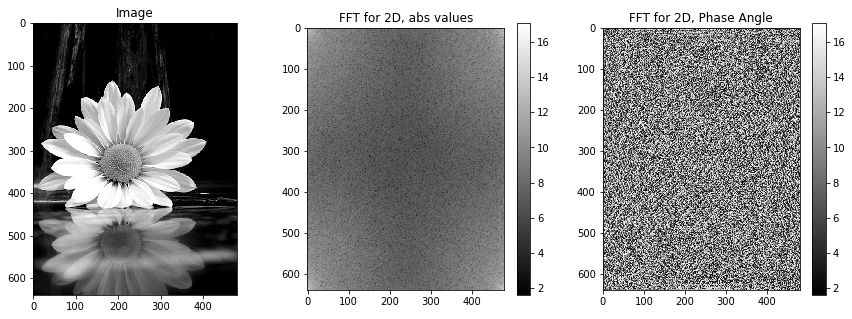

In [10]:
fname = 'pic1.jpg' #we can add any random pic here
image_data = Image.open(fname).convert("L")

#we get a numpy array so that we can perform computations
img = np.array(image_data)

figure=plt.figure(figsize=(15,5))

fig1=figure.add_subplot(131)
fig1.imshow(img,'gray')
fig1.set_title("Image")

spec = np.fft.fft2(img)

#spec is an array of complex numbers, thus we plot abs value (we take log for clearer difference) and arguments

fig2=figure.add_subplot(132)
t=fig2.imshow(np.log(1+np.abs(spec)),'gray')
fig2.set_title("FFT for 2D, abs values")
figure.colorbar(t)

fig3=figure.add_subplot(133)
fig3.imshow(np.angle(spec), "gray")
fig3.set_title("FFT for 2D, Phase Angle")
figure.colorbar(t)


plt.show()

We can observe that the lower frequencies (whiter points) are at the corners. We can center them so that it is easier to visualize. We can also observe that there is no clear pattern in the phase angles. 

In [11]:
#function to perform fourier transform and print it
def fourier(img):
    spec = np.fft.fft2(img)
    centered_spec = np.fft.fftshift(spec)
    return centered_spec

def print_fourier(url):
    #we can add any random pic here
    image_data = Image.open(url).convert("L")
    
    figure=plt.figure(figsize=(15,5))

    #we get a numpy array so that we can perform computations
    img = np.array(image_data)
    center=fourier(img)
    
    fig1=figure.add_subplot(121)
    fig1.imshow(img, 'gray')
    fig1.set_title("Image")
    
    fig2=figure.add_subplot(122)
    #we add 1 to prevent 0 from causing problems
    fig2.imshow(np.log(1+np.abs(center)), "gray")
    fig2.set_title("FFT (centered)")
    return

In [12]:
def inv_fourier(fft):
    inv_center = np.fft.ifftshift(fft)
    processed_img = np.fft.ifft2(inv_center)
    return processed_img

def print_invFourier(fft):
    figure=plt.figure(figsize=(15,5))

    #we get a numpy array so that we can perform computations
    ift=inv_fourier(fft)
    fig1=figure.add_subplot(121)
    fig1.imshow(np.log(1+np.abs(fft)), 'gray')
    fig1.set_title("Fourier")
    
    fig2=figure.add_subplot(122)
    #we add 1 to prevent 0 from causing problems
    fig2.imshow(np.abs(ift), "gray")
    fig2.set_title("Image")
    return

Then we can find many patterns in the fourier transforms of various shapes. 

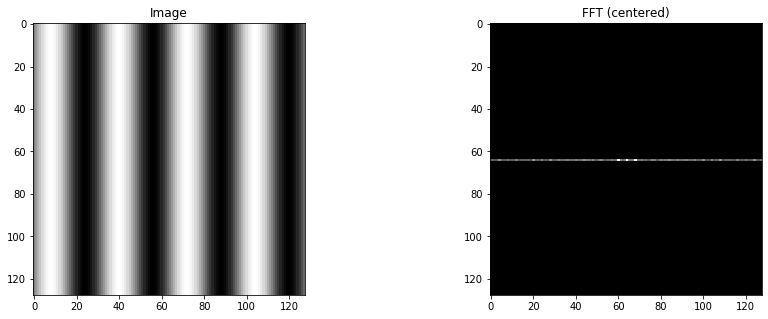

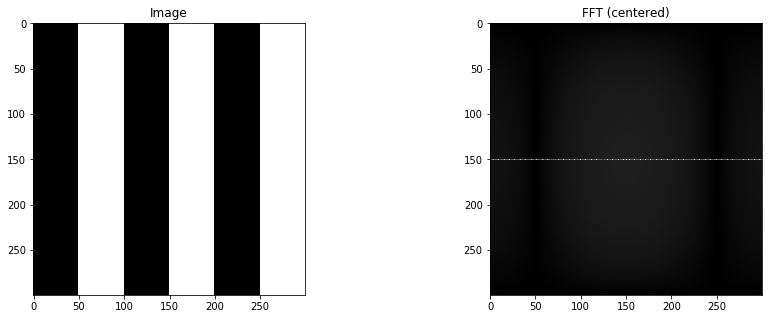

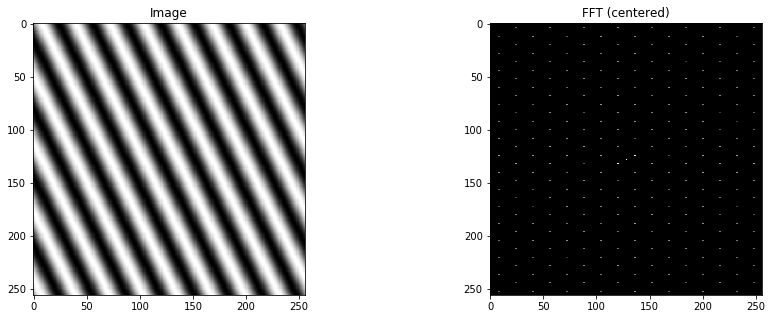

In [5]:
print_fourier('vertsine.jpg')
print_fourier('3strips.jpg')
print_fourier('diagonalsine.jpg')

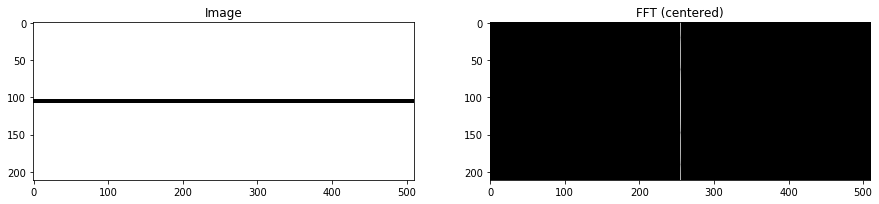

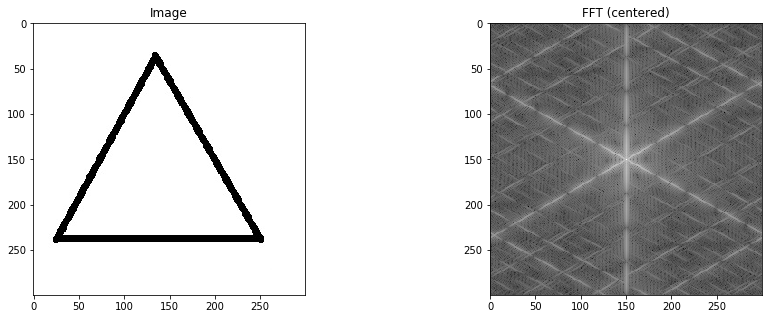

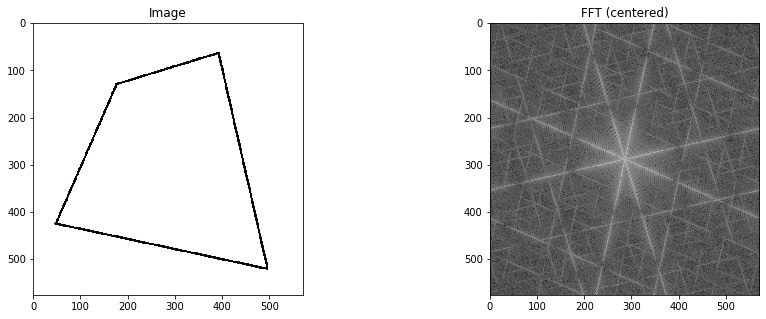

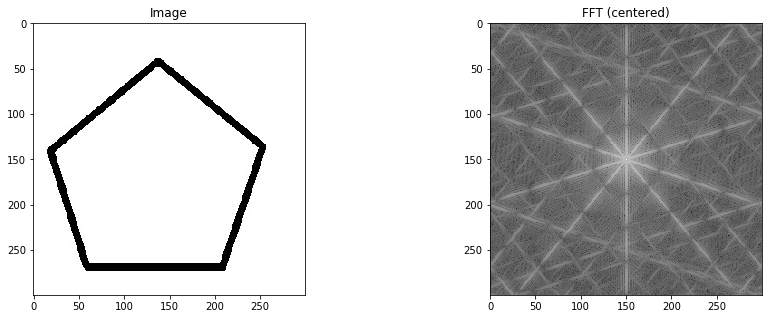

In [6]:
print_fourier('s2.jpg')
print_fourier('triangle.jpg')
print_fourier('s4.jpg')
print_fourier('pent.jpg')

## 2. Applying Filters

We can do many things once we have the fourier transform of the image. We can filter out noise, which will be the higher frequencies: <b> Low Pass Filter </b> It allows only low frequencies to pass

We can also filter lower frequencies: <b> High Pass Filter </b>

A combination of both will be a bandpass filter.

#### Basic Technique

1. Implement Fast Fourier Transformation to transform gray scaled image into frequency
2. Visualize and Centralize zero-frequency component
3. Apply low/high pass filter to filter frequencies
4. Decentralize
5. Implement inverse Fast Fourier Transformation to generate image data

In [13]:
def get_dist(x,y):
    return np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

def LowPass(img,rad):
    filter_=np.zeros(img.shape)
    rows, cols = img.shape
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            #a circle with values 1 inside and 0 outside
            if get_dist((y,x),center) < rad:
                filter_[y,x] = 1
    return img*filter_

def HighPass(img,rad):
    filter_=np.zeros(img.shape)
    rows, cols = img.shape
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            #a circle with values 0 inside and 1 outside
            if get_dist((y,x),center) > rad:
                filter_[y,x] = 1
    return img*filter_

def BandPass(img,r1,r2):
    '''Takes in an array and two radii r1 and r2, where r1>r2 and it will allow frequencies between them to pass'''
    filter_=np.zeros(img.shape)
    rows, cols = img.shape
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if get_dist((y,x),center) > r2 and get_dist((y,x),center) < r1 :
                filter_[y,x] = 1
    return img*filter_


def GaussianLowPass(img,rad):
    filter_=np.zeros(img.shape)
    rows, cols=img.shape
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            filter_[y,x] = np.exp(((-get_dist((y,x),center)**2)/(2*(rad**2))))
    return img*filter_

def GaussianHighPass(img,rad):
    filter_=np.ones(img.shape)
    rows, cols=img.shape
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            filter_[y,x] = 1 - np.exp(((-get_dist((y,x),center)**2)/(2*(rad**2))))
    return img*filter_

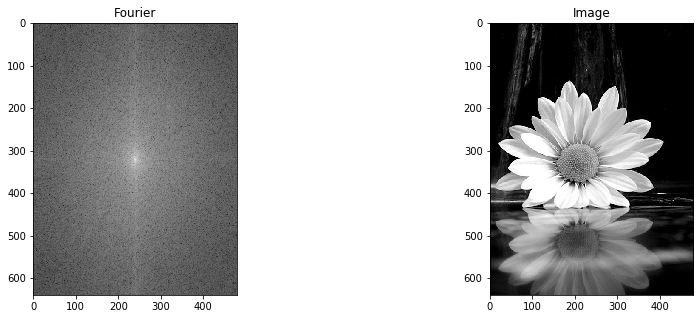

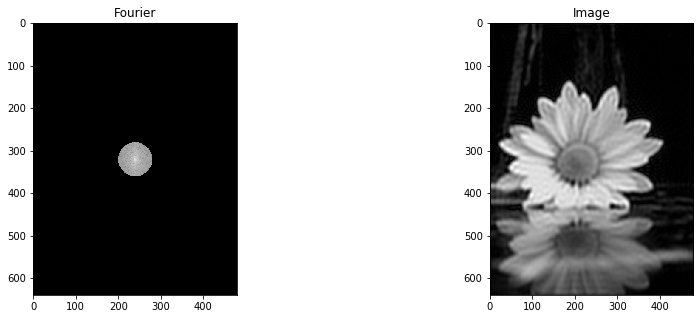

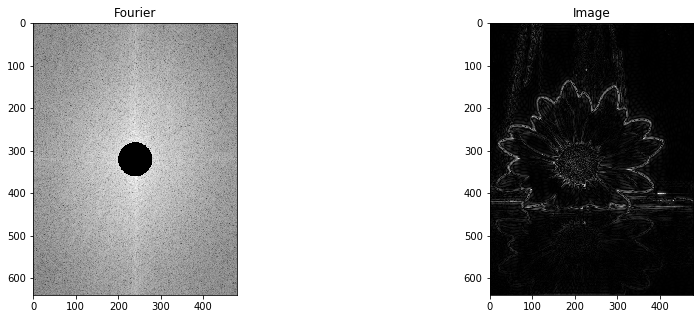

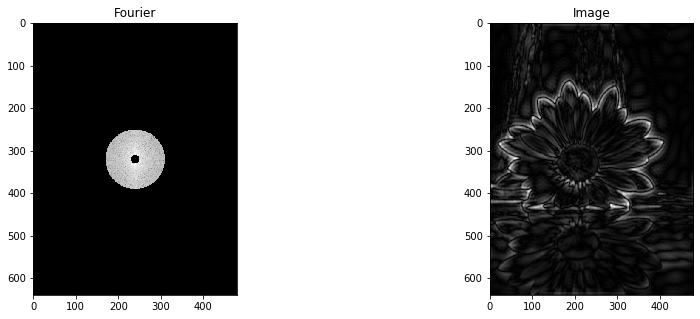

In [14]:
ft=fourier(img)
print_invFourier(ft)

Lp=LowPass(ft,40)
Hp=HighPass(ft,40)

Bp=BandPass(ft,70,10)

Glp=GaussianLowPass(ft,40)
Ghp=GaussianHighPass(ft,40)


print_invFourier(Lp)
print_invFourier(Hp)
print_invFourier(Bp)

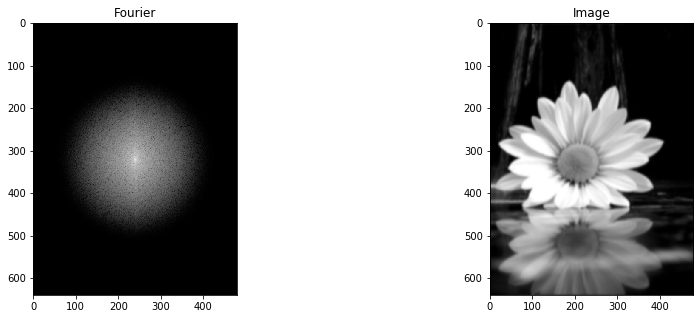

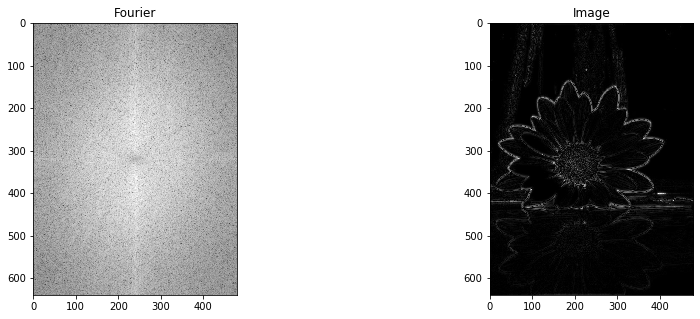

In [15]:
print_invFourier(Glp)
print_invFourier(Ghp)

## 3. Applying Fourier to detect contour, then calculate eccentricity of images of galaxies

The Galaxy Zoo is a huge dataset of images of galaxies which is open to public for classifying. When we find the dataset filter information, we can use ML to guess the type of galaxy. One important factor will be the eccentricity of the disc of galaxy. We can use Fourier Transform to separate out the edges and then fit an ellipse to it to get the eccentricity.

In [16]:
from skimage import filters
from skimage import exposure
from skimage import measure

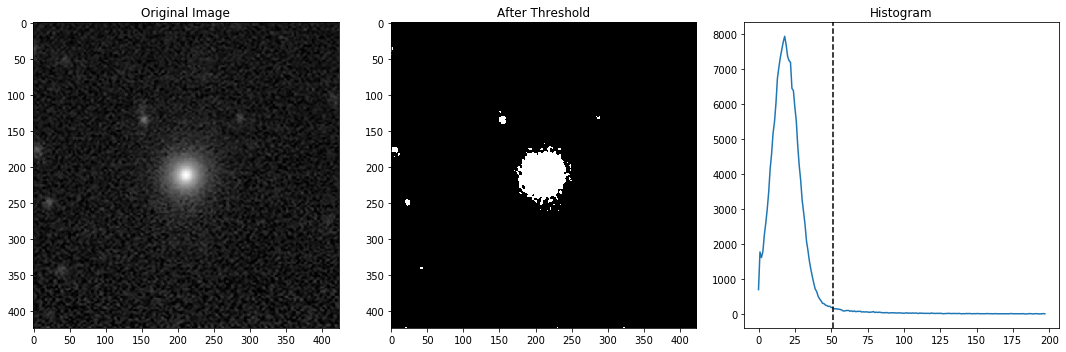

In [17]:
fname = 'ellip1.jpg' #we can add the images here
image_data = Image.open(fname).convert("L")
img = np.array(image_data)

# before using the high pass filter we can use a threshold value, below which we can set the value to zero

# We can use various parameters, but I have used otsu's threshold
val = filters.threshold_otsu(img)

# We can use this to visualise which values of pixels are we keeping
hist, bins_center = exposure.histogram(img)

imnew=img > val

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, 'gray')
plt.title("Original Image")
plt.subplot(132)
plt.imshow(imnew,'gray')
plt.title("After Threshold")
plt.subplot(133)
plt.plot(bins_center, hist)
plt.axvline(val, color='k', ls='--')
plt.title("Histogram")

plt.tight_layout()
plt.show()

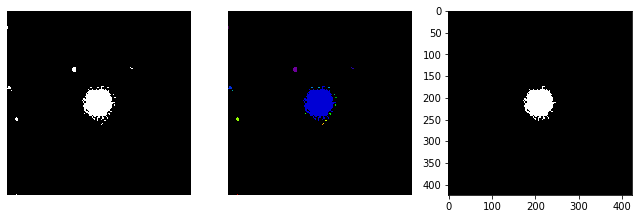

In [18]:
blobs_labels = measure.label(imnew, background=0)

plt.figure(figsize=(9, 3.5))
plt.subplot(131)
plt.imshow(imnew, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(blobs_labels, cmap='nipy_spectral')
plt.axis('off')

y = np.bincount(blobs_labels.flatten()) 
maximum = max(y[1:])
for i in range(len(y)): 
    if y[i] == maximum: 
        mxm=i

imnew=blobs_labels==mxm

plt.subplot(133)
plt.imshow(imnew,'gray')
plt.tight_layout()
plt.show()

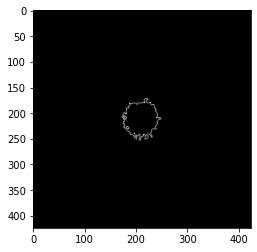

In [19]:
# Now we can apply our Fourier Transforms
fft=fourier(imnew)
glp=GaussianHighPass(fft,60)
bdr=np.abs(inv_fourier(glp))
plt.imshow(bdr,'gray')

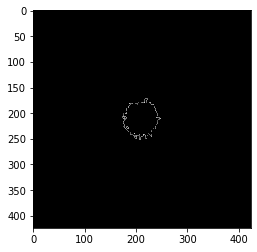

In [20]:
#We can extract the points at which Fourier transform gives values using a scatter plot
xs=[]
ys=[]
mx=np.max(bdr)/3
for i in range(len(bdr)):
    for j in range(len(bdr[i])):
        if bdr[i][j]<mx:
            bdr[i][j]=0
        else:
            ys.append(i)
            xs.append(j)
plt.imshow(bdr,'gray')

(169.2901433691756, 250.7098566308244, 256.01517660044146, 167.9848233995585)

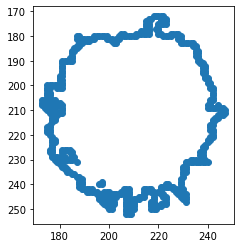

In [21]:
plt.scatter(xs,ys)
plt.gca().invert_yaxis() #since imshow inverts the axes
plt.axis('scaled')

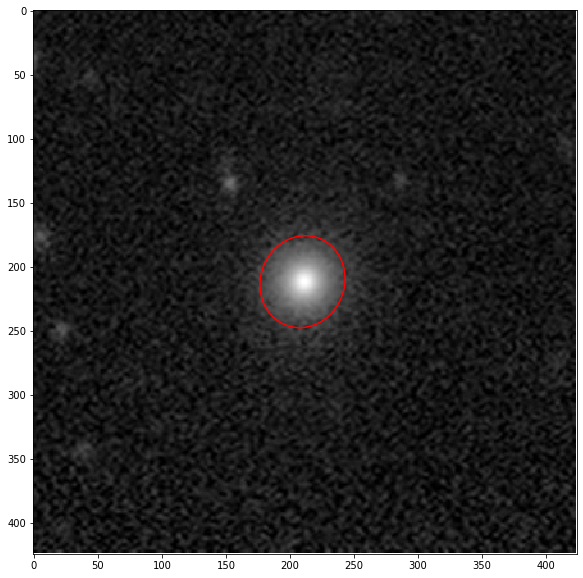

In [22]:
# Extract x coords and y coords of the ellipse as column vectors
X = np.array([xs]).T
Y = np.array([ys]).T

# Fit an ellipse using the least squares problem ||Ax - b ||^2
a = np.hstack([X**2, X * Y, Y**2, X, Y])
b = np.ones_like(X)
x = np.linalg.lstsq(a, b,rcond=-1)[0].squeeze()

# Plot the least squares ellipse (We cannot use plt.plot directly since it is not a function)
x_coord = np.linspace(0,img.shape[0],600)
y_coord = np.linspace(0,img.shape[1],600)
X_coord, Y_coord = np.meshgrid(x_coord, y_coord)

fig=plt.figure(figsize=(10,10))
fig1=fig.add_subplot(111)
fig1.imshow(img,'gray')
Z_coord = x[0] * X_coord ** 2 + x[1] * X_coord * Y_coord + x[2] * Y_coord**2 + x[3] * X_coord + x[4] * Y_coord
fig1.contour(X_coord, Y_coord, Z_coord, levels=[1], colors=('r'))

plt.show()

Now we simply calculate the eccentricity

We know the general equation for ellipse is:
$ Ax^2+Bxy+Cy^2+Dx+Ey+F=0 $

$ e^2=\frac{2\sqrt{(A−C)^2+B^2}}{\sqrt{ \sigma (A+C)+(A−C)^2+B^2}} $

Where $ \sigma = $ sign of $ F(B^2−4AC)+(AE^2−BDE+CD^2) $

In [23]:
# Print the equation of the ellipse in standard form
print('The ellipse is given by {0:.3}x^2 + {1:.3}xy+{2:.3}y^2+{3:.3}x+{4:.3}y = 1'.format(x[0], x[1],x[2],x[3],x[4]))

A,B,C,D,E=x
F=-1

sigma= np.sign(F*(B**2-4*A*C)+((A*(E**2))-(B*D*E)+(C*(D**2))))
e_sq=(2*np.sqrt((A-C)**2 + B**2))/((sigma*(A+C)+np.sqrt(((A-C)**2)+B**2)))

print('Eccentricity is {0:.3}'.format(np.sqrt(e_sq)))

The ellipse is given by -1.15e-05x^2 + -1.42e-06xy+-9.88e-06y^2+0.00514x+0.00448y = 1
Eccentricity is 0.43


In [25]:
#collecting all these bits of code
def estimate_ellipse(url):
    image_data = Image.open(url).convert("L")
    img = np.array(image_data)
    val = filters.threshold_otsu(img)
    
    im=img > val
    
    blobs_labels = measure.label(im, background=0)
    
    y = np.bincount(blobs_labels.flatten()) 
    maximum = max(y[1:])
    for i in range(len(y)): 
        if y[i] == maximum: 
            mxm=i

    imnew=blobs_labels==mxm
    
    fft=fourier(imnew)
    glp=GaussianHighPass(fft,60)
    bdr=np.abs(inv_fourier(glp))
    xs=[]
    ys=[]
    mx=np.max(bdr)/3
    for i in range(len(bdr)):
        for j in range(len(bdr[i])):
            if bdr[i][j]<mx:
                bdr[i][j]=0
            else:
                ys.append(i)
                xs.append(j)
    X = np.array([xs]).T
    Y = np.array([ys]).T

    a = np.hstack([X**2, X * Y, Y**2, X, Y])
    b = np.ones_like(X)
    x = np.linalg.lstsq(a, b,rcond=-1)[0].squeeze()

    # Plot the least squares ellipse (We cannot use plt.plot directly since it is not a function)
    x_coord = np.linspace(0,img.shape[0],600)
    y_coord = np.linspace(0,img.shape[1],600)
    X_coord, Y_coord = np.meshgrid(x_coord, y_coord)

    fig=plt.figure(figsize=(10,10))
    fig1=fig.add_subplot(111)
    fig1.imshow(img,'gray')
    Z_coord = x[0] * X_coord ** 2 + x[1] * X_coord * Y_coord + x[2] * Y_coord**2 + x[3] * X_coord + x[4] * Y_coord
    fig1.contour(X_coord, Y_coord, Z_coord, levels=[1], colors=('r'))

    plt.show()
    
    # Print the equation of the ellipse in standard form
    print('The ellipse is given by {0:.3}x^2 + {1:.3}xy+{2:.3}y^2+{3:.3}x+{4:.3}y = 1'.format(x[0], x[1],x[2],x[3],x[4]))

    A,B,C,D,E=x
    F=-1

    sigma= np.sign(F*(B**2-4*A*C)+((A*(E**2))-(B*D*E)+(C*(D**2))))
    e_sq=(2*np.sqrt((A-C)**2 + B**2))/((sigma*(A+C)+np.sqrt(((A-C)**2)+B**2)))

    print('Eccentricity is {0:.3}'.format(np.sqrt(e_sq)))
    return

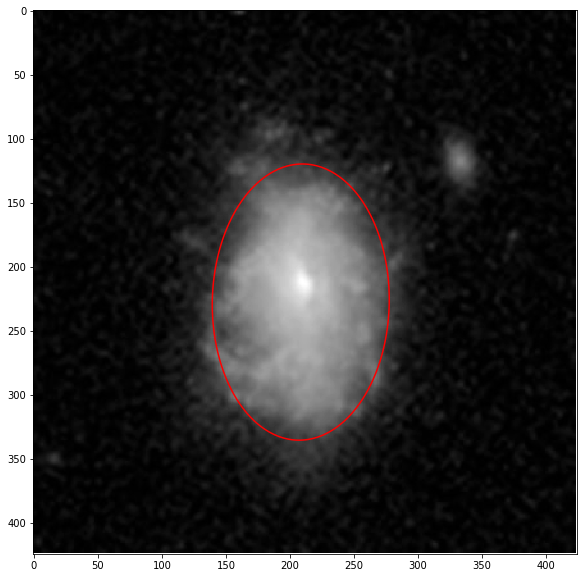

The ellipse is given by -1.64e-05x^2 + -3.9e-07xy+-6.73e-06y^2+0.00692x+0.00314y = 1
Eccentricity is 0.768


In [26]:
estimate_ellipse('spiral1.jpg')

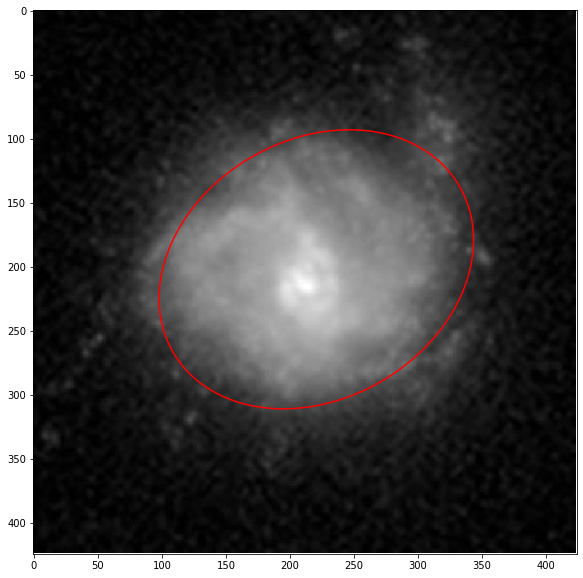

The ellipse is given by -9.34e-06x^2 + -4.42e-06xy+-1.19e-05y^2+0.00501x+0.00576y = 1
Eccentricity is 0.622


In [27]:
estimate_ellipse('spiral2.jpg')

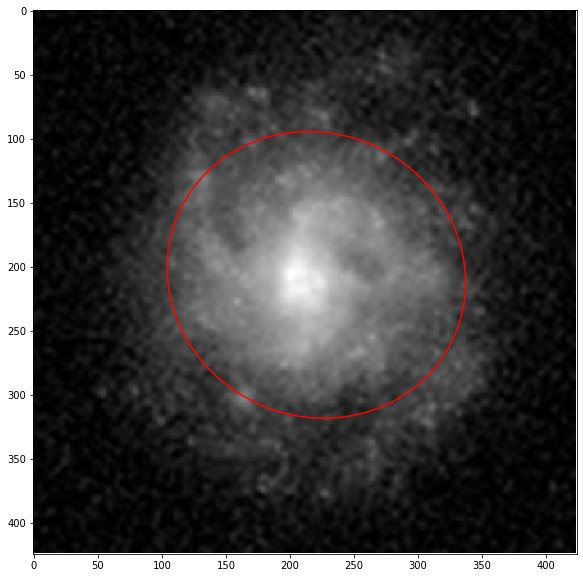

The ellipse is given by -1.31e-05x^2 + 1.4e-06xy+-1.42e-05y^2+0.00549x+0.00554y = 1
Eccentricity is 0.349


In [28]:
estimate_ellipse('spiral3.jpg')

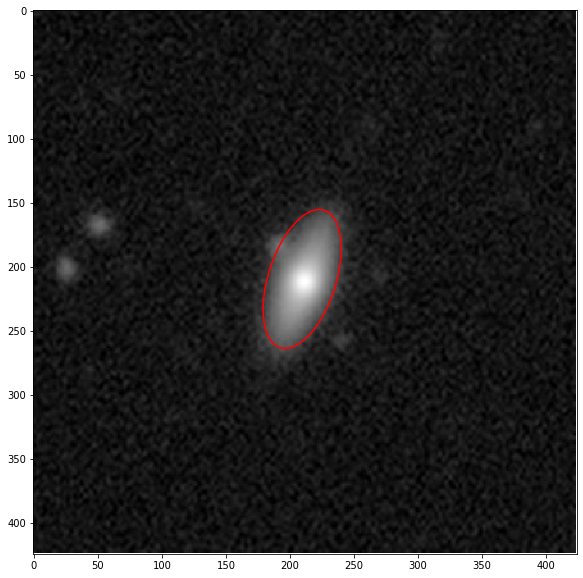

The ellipse is given by -1.27e-05x^2 + -6.24e-06xy+-4.02e-06y^2+0.00665x+0.00299y = 1
Eccentricity is 0.884


In [29]:
estimate_ellipse('ellip2.jpg')

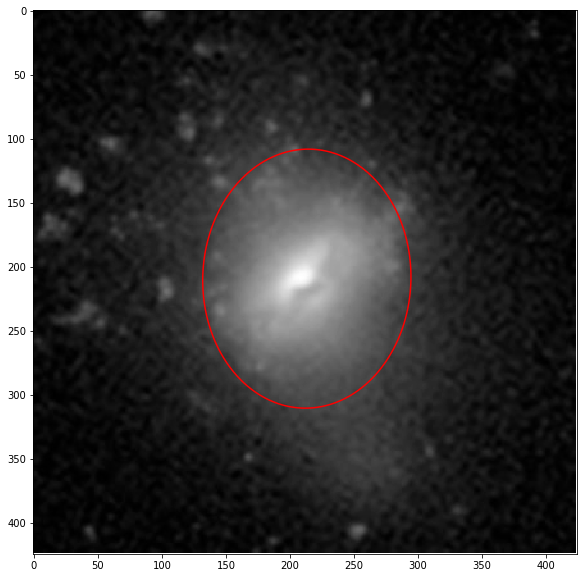

The ellipse is given by -1.47e-05x^2 + -3.29e-07xy+-9.49e-06y^2+0.00633x+0.00404y = 1
Eccentricity is 0.595


In [30]:
estimate_ellipse('ellip3.jpg')

### References

- https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm
- https://webpages.uncc.edu/~jmconrad/GradStudents/Thesis_Raut.pdf
- https://www.zooniverse.org/projects/zookeeper/galaxy-zoo/classify

________________________________
## 4. Pre Processing Images (just some exploring)

We can use image processing on various shapes to see how we can use it to our advantage.

In [10]:
from tkinter import *
from PIL import ImageGrab,Image,ImageTk,ImageFilter
import matplotlib
matplotlib.use('TkAgg')

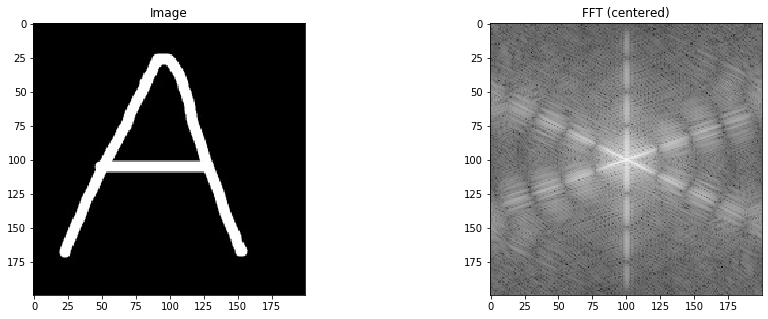

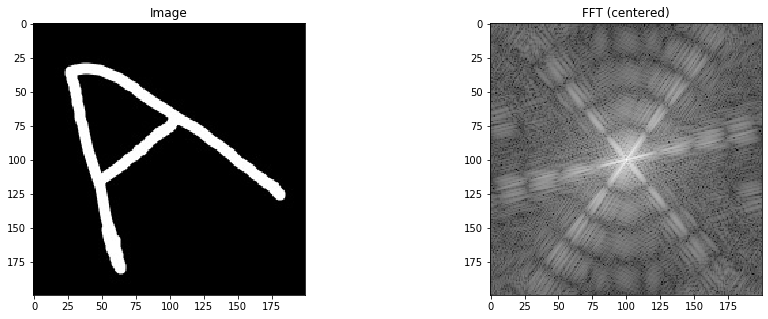

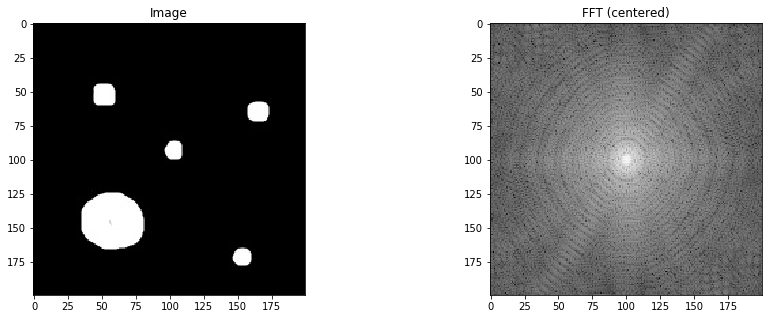

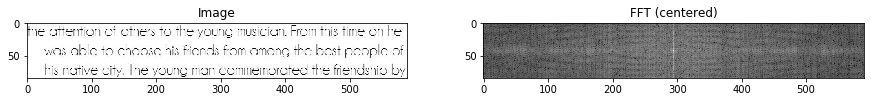

In [11]:
print_fourier('A.jpg')
print_fourier('A2.jpg')
print_fourier('dots.jpg')
print_fourier('Be.jpg')

I have written a tkinter program to try out patterns we can make by ourselves and see the fourier transforms.

In [ ]:
def my_fourier(img):
    img = img.convert('L')
    arr = np.array(img)
    arr = np.array([(255 - x)/255 for x in arr])
    figure=plt.figure(figsize=(15,5))

    #we get a numpy array so that we can perform computations
    center=fourier(arr)
    
    fig1=figure.add_subplot(121)
    fig1.imshow(arr, 'gray')
    fig1.set_title("Image")
    
    fig2=figure.add_subplot(122)
    #we add 1 to prevent 0 from causing problems
    fig2.imshow(np.log(1+np.abs(center)), "gray")
    fig2.set_title("FFT (centered)")
    #messagebox.showinfo(message='Have a good day')

class main:
    def __init__(self,master):
        self.master = master
        self.old_x = None
        self.old_y = None
        self.penwidth = 30
        self.c = Canvas(self.master,width=500,height=500,bg='white',)
        self.drawWidgets()
        self.c.bind('<B1-Motion>',self.paint)
        self.c.bind('<ButtonRelease-1>',self.reset)

    def paint(self,e):
        if self.old_x and self.old_y:
            self.c.create_line(self.old_x,self.old_y,e.x,e.y,width=self.penwidth,fill='black',capstyle=ROUND,smooth=True)
        self.old_x = e.x
        self.old_y = e.y

    def reset(self,e):    #reseting or cleaning the canvas
        self.old_x = None
        self.old_y = None

    def clear(self):
        self.c.delete(ALL)
        
    def drawWidgets(self):
        self.c.grid(row=0,column=0,columnspan=3)
        self.predict=Button(self.master,text='Get Fourier',width=10,height=1,command=self.fft)
        self.predict.grid(row=1,column=0)
        self.clear=Button(self.master,text='Clear',width=10,height=1,command=self.clear)
        self.clear.grid(row=1,column=1)
        self.exit=Button(self.master,text='Exit',width=10,height=1,command=self.master.destroy)
        self.exit.grid(row=1,column=2)
    
    def fft(self):
        #self.master.update()
        x = self.master.winfo_rootx() * 1.2
        y = self.master.winfo_rooty() * 1.2
        x1 = x + 650
        y1 = y + 650
        self.master.geometry('500x540+{}+{}'.format(int(x*1.5),int(y*1.5)))
        im=ImageGrab.grab().crop((x,y,x1,y1))
        
        my_fourier(im)


root = Tk()
start=main(root)
root.title('Predict Number')
root.resizable(False,False)
root.geometry('500x540')
root.mainloop()
